In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv


In [89]:
df=pd.read_csv("/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv")
df.head()
# df.describe()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [90]:
df.dropna(axis=0)
df.dropna(axis=1)

df.iloc[:,0]

0            1
1            1
2            1
3            1
4            1
          ... 
6362615    743
6362616    743
6362617    743
6362618    743
6362619    743
Name: step, Length: 6362620, dtype: int64

In [91]:
s=set(df["type"])
print(s)

print(df.loc[0,["type"]])
print(df["type"][0])

{'PAYMENT', 'CASH_OUT', 'CASH_IN', 'DEBIT', 'TRANSFER'}
type    PAYMENT
Name: 0, dtype: object
PAYMENT


In [92]:
l=[]
for i in range(len(df["type"])):
    if df["type"][i]=="CASH_IN" or df["type"][i]=="PAYMENT" or df["type"][i]=="DEBIT":
        l.append(i)

In [127]:
df_dropped=df.drop(l,axis=0)
df_reset=df_dropped.reset_index(drop=True)
df_reset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
1,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
2,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
3,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
4,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2770404,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
2770405,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
2770406,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
2770407,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [ ]:
for i in range(len(df["type"])):
    if df["type"][i]=="TRANSFER" and df["isFraud"][i]==1:
        print(df.loc[i,:])
        break

In [128]:
# for i in range(len(df_reset["nameOrig"])):
#     df_reset.at[i,"nameOrig"]=df_reset["nameOrig"][i][:1]
#     df_reset.at[i,"nameDest"]=df_reset["nameDest"][i][:1]
# df_reset
df_reset['nameOrig'] = df_reset['nameOrig'].str[0]
df_reset['nameDest'] = df_reset['nameDest'].str[0]
df_reset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.00,C,181.00,0.0,C,0.00,0.00,1,0
1,1,CASH_OUT,181.00,C,181.00,0.0,C,21182.00,0.00,1,0
2,1,CASH_OUT,229133.94,C,15325.00,0.0,C,5083.00,51513.44,0,0
3,1,TRANSFER,215310.30,C,705.00,0.0,C,22425.00,0.00,0,0
4,1,TRANSFER,311685.89,C,10835.00,0.0,C,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2770404,743,CASH_OUT,339682.13,C,339682.13,0.0,C,0.00,339682.13,1,0
2770405,743,TRANSFER,6311409.28,C,6311409.28,0.0,C,0.00,0.00,1,0
2770406,743,CASH_OUT,6311409.28,C,6311409.28,0.0,C,68488.84,6379898.11,1,0
2770407,743,TRANSFER,850002.52,C,850002.52,0.0,C,0.00,0.00,1,0


In [124]:
# l1=[]
# l2=[]
# for i in range(len(df_reset["isFraud"])):
#     if df_reset["isFraud"][i]==1:
#         l1.append(i)
#     else:
#         l2.append(i)
        
# df_reset1=df_reset.drop(l2,axis=0)
# df_reset2=df_reset.drop(l1,axis=0)
# df_reset2=df_reset2.sample(n=8213)
# df_reset=pd.concat([df_reset1,df_reset2],axis=0)
# df_reset

In [129]:

df2=df_reset.drop(["isFraud"],axis=1)


y=df_reset["isFraud"]
df2

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,TRANSFER,181.00,C,181.00,0.0,C,0.00,0.00,0
1,1,CASH_OUT,181.00,C,181.00,0.0,C,21182.00,0.00,0
2,1,CASH_OUT,229133.94,C,15325.00,0.0,C,5083.00,51513.44,0
3,1,TRANSFER,215310.30,C,705.00,0.0,C,22425.00,0.00,0
4,1,TRANSFER,311685.89,C,10835.00,0.0,C,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...,...,...
2770404,743,CASH_OUT,339682.13,C,339682.13,0.0,C,0.00,339682.13,0
2770405,743,TRANSFER,6311409.28,C,6311409.28,0.0,C,0.00,0.00,0
2770406,743,CASH_OUT,6311409.28,C,6311409.28,0.0,C,68488.84,6379898.11,0
2770407,743,TRANSFER,850002.52,C,850002.52,0.0,C,0.00,0.00,0


In [130]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df2["type"])
# Drop column B as it is now encoded
df2 = df2.drop("type",axis = 1)
# Join the encoded df
df2 = df2.join(one_hot)
df2=df2.drop(["nameOrig","nameDest"],axis=1)
x=df2
x

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,TRANSFER
0,1,181.00,181.00,0.0,0.00,0.00,0,False,True
1,1,181.00,181.00,0.0,21182.00,0.00,0,True,False
2,1,229133.94,15325.00,0.0,5083.00,51513.44,0,True,False
3,1,215310.30,705.00,0.0,22425.00,0.00,0,False,True
4,1,311685.89,10835.00,0.0,6267.00,2719172.89,0,False,True
...,...,...,...,...,...,...,...,...,...
2770404,743,339682.13,339682.13,0.0,0.00,339682.13,0,True,False
2770405,743,6311409.28,6311409.28,0.0,0.00,0.00,0,False,True
2770406,743,6311409.28,6311409.28,0.0,68488.84,6379898.11,0,True,False
2770407,743,850002.52,850002.52,0.0,0.00,0.00,0,False,True


In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
x_train = scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9968380131460687
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552390
           1       0.48      0.42      0.45      1692

    accuracy                           1.00    554082
   macro avg       0.74      0.71      0.72    554082
weighted avg       1.00      1.00      1.00    554082



Confusion Matrix:
[[551614    776]
 [   976    716]]


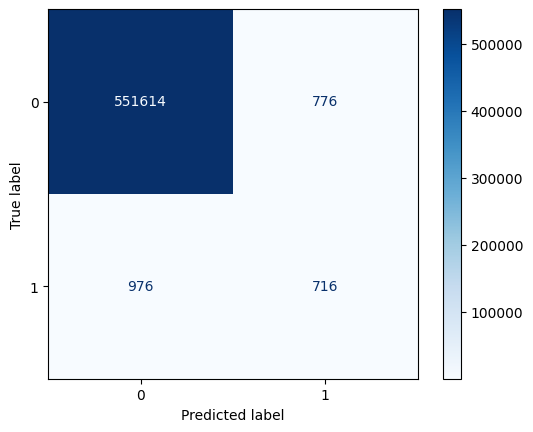

In [134]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()